<h1><center><font size="6">Final Presentation Notebook for Automated Hate Tweet Detection</font></center></h1>

# Contents


- <a href='#1'>Introduction and Business Understanding:</a>
- <a href='#2'>Data Sources and Understanding:</a>
    - Importing Packages
    - Original Dataset
- <a href='#3'></a>
    - EDA and Feature Engineering
        - Word Count Per Tweet
        - Number of Characters Per tweet
        - Avereage Word Length Per Tweet
        - Hashtags Count 
    - Data Preprocessing
    - Assigning Target Variable
    - Train-Validation-Test Split
    - Frequency Distributions
    - TSNE
    - WordCloud
- <a href='#4'>Modeling and Evaluation Process:</a>
    - Multinomial Naive Bayes
    - Random Forest
    - Logistic Regression
    - Support Vector Machine
    - Adaboost Classifier
    - Gradient Boost Classifier
- <a href='#5'>Class Imbalance:</a>
    - Resampling Methods
        - RandomUnderSampler
        - CondensedNearestNeighbour
        - SMOTE-ENN
    - Additional Datasets
        - Aristotle University Dataset
        - Twitter API
        - University of Copenhagen Dataset
        - HASOC 2019 and 2020 Dataset
    - Validation-Test Split
- <a href='#6'>Evaluation</a>

# <a id='1'>Introduction and Business Understanding:</a>

***Why should we care about regulating or detecting hate speech in the first place?  Why would we want to impinge on a freedom that has been afforded to us by the Constitution under the First Amendment?***  

All modern democracies are in agreement that hate speech that incites violence or harm towards another group should be prohibited. However, democracies around the world take much more stringent measures against curbing hate speech than the United States because laws criminalizing such speech would violate the guarantee to the rights afforded to its citizens by the 1st Amendment. As a result,since we believe in this fundamental right to freedom of speech as afforded to us by the Constitution, there has been little to non-existent regulation of hate speech. 

Recent events have demonstrated how words have the power to incite others to violence, namely the insurrection against one of our own hallowed institutions at the Capital on January 6th. We have also seen the recent rise in Asian-American hate crime throughout the nation culminating in the Atlanta shooting due to the incessant invocation of words associating COVID with China like "Kung-flu" or "Chinavirus" by our top officials. A recent NYU study from 2019 has found a direct link between the number of racist tweets and real-life hate crimes in 100 US cities, and Twitter has been hugely criticized for being complacent in curbing hate speech on their platform.    

A key challenge in the automated detection of hate speech is differentiating between hate speech and offensive language. Hate speech is defined as public speech that expresses hate, disparages, or incites violence against another individual or group based on some characteristic such as race, gender, religious belief, sexual orientation, etc. It is important to acknowledge that the exact definition of hate speech can differ from country to countrycan differ from country to country, even from region to region within the same country.  Furthermore, the same hate or derogatory word can have different usages and its semantics can change from context to context. 

Some examples of the ever-pervasive 4 letter f-word will easily demonstrate this ambiguity or dichotomy:  "f@!k the (insert ethnic group), they need to go back where they came from" vs. "fuck my life and everyone in it, i work so hard but get no where. #f@!&mylife". In the former, the word is used to express hate towards an ethnic group, but in the latter, it is more of an expression of when things don't go right or how you would have expected it to.  If you look at the word f****t, aka the derogatory term for homosexuals, it is clearly used as a word of hate, but for some in the LGBT community, reclaiming the word from its more negative connotation into an expression of playfulness even pride has been an important step in their personal identity journey.

Sparked by the alarming nature of recent events, social media platforms have already implemented algorithms to regulate or remove hate tweets, and having the ability to differentiate between hate versus non-hate is an integral part of any model. It would need to be able to go beyond identifying singular words, but incorporate the environment around and semantics of each word.

# <a id='2'>Data Sources and Understanding:</a>

## Importing Packages

In [1]:
# importing packages
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import re as regex
import pickle
import datetime
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

# importing packages for Plotly visualizations
import plotly
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly import graph_objs
# import chart_studio.plotly as py
plotly.offline.init_notebook_mode()
# from IPython.core.interactiveshell import InteractiveShell
# import plotly.figure_factory as ff
# InteractiveShell.ast_node_interactivity = 'all'


# import NLP packages
import nltk
import string
import multiprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.text import FreqDistVisualizer, TSNEVisualizer
from yellowbrick.text.tsne import tsne
from yellowbrick.text.freqdist import freqdist
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec



# import modeling packages
from sklearn import linear_model, utils, svm
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek, SMOTEENN


%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("py/")
from utils import *
from config import keys
from preprocess import *

## Davidson Dataset

The Davidson Dataset contains 24,802 tweets with 5.77% labeled as hate, 77.43% as offensive, and 16.80% as Neutral using crowdsourcing for annotating the tweets into the 3 classes. I started with this dataset as it contained the tweet text without having to download it from Twitter API.

Initially I had some difficulty signing up for a developer account because I wanted to acquire the tweet and the metadata for this project and perhaps another project linking hate crime to hate tweets.  I found that keeping it simple in scope when applying for the API ensured quick approval.  The Twitter folks were quick to respond despite all the comments I read about how long they took to respond.


In [2]:
# import dataframe into notebook
df = pd.read_csv("data/labeled_data.csv", index_col=0)
df.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [3]:
# get dimensions of dataframe
df.shape

(24783, 6)

In [4]:
# rename columns for easier reference
df = df.rename(columns={"hate_speech": 'hate', "offensive_language": 'offensive', "neither": 'neutral', "class": 'target'})
df.head()

count  hate  offensive  neutral  target  \
0      3     0          0        3       2   
1      3     0          3        0       1   
2      3     0          3        0       1   
3      3     0          2        1       1   
4      6     0          6        0       1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

## Target Variable

Once we have identified our target variable, we want to visualize the distribution.  The figure below indicates that overwhelmingly tweets categorized as offensive totaling over 19,000, while hate tweets comprise a mere 1430.  

The major challenge of automated hate speech detection is the separation of hate speech from offensive language. The methodology behind this study was to collect tweets that contained terms from the Hatebase.org lexicon.  

Hate speech, as defined by ALA, is any form of expression intending to vilify, humiliate, or incite hatred against a group or an individual on the basis of race, religion, skin color, sexual or gender identity, ethnicity, disability, or national origin.

While it is protected by the First Amendment, if it incites criminal activity or threats of violence against a person or group, then it can be criminalized.

In [5]:
# display class distribution
hate = len(df[df['target'] == 0])
off = len(df[df['target'] == 1])
neu = len(df[df['target'] == 2])
dist = [
    graph_objs.Bar(
        x=["hate", "offensive", "neutral"],
        y=[hate, off, neu],
)]
plotly.offline.iplot({"data":dist, "layout":graph_objs.Layout(title="Class Distribution")})

In [6]:
# create hate and non-hate categories by combining offensive and neutral categories
df2 = df.copy()
df2.target = df2.target.replace([2], 1)
df2.target = df2.target.replace([0, 1], [1, 0])
df2.target.value_counts()

0    23353
1     1430
Name: target, dtype: int64

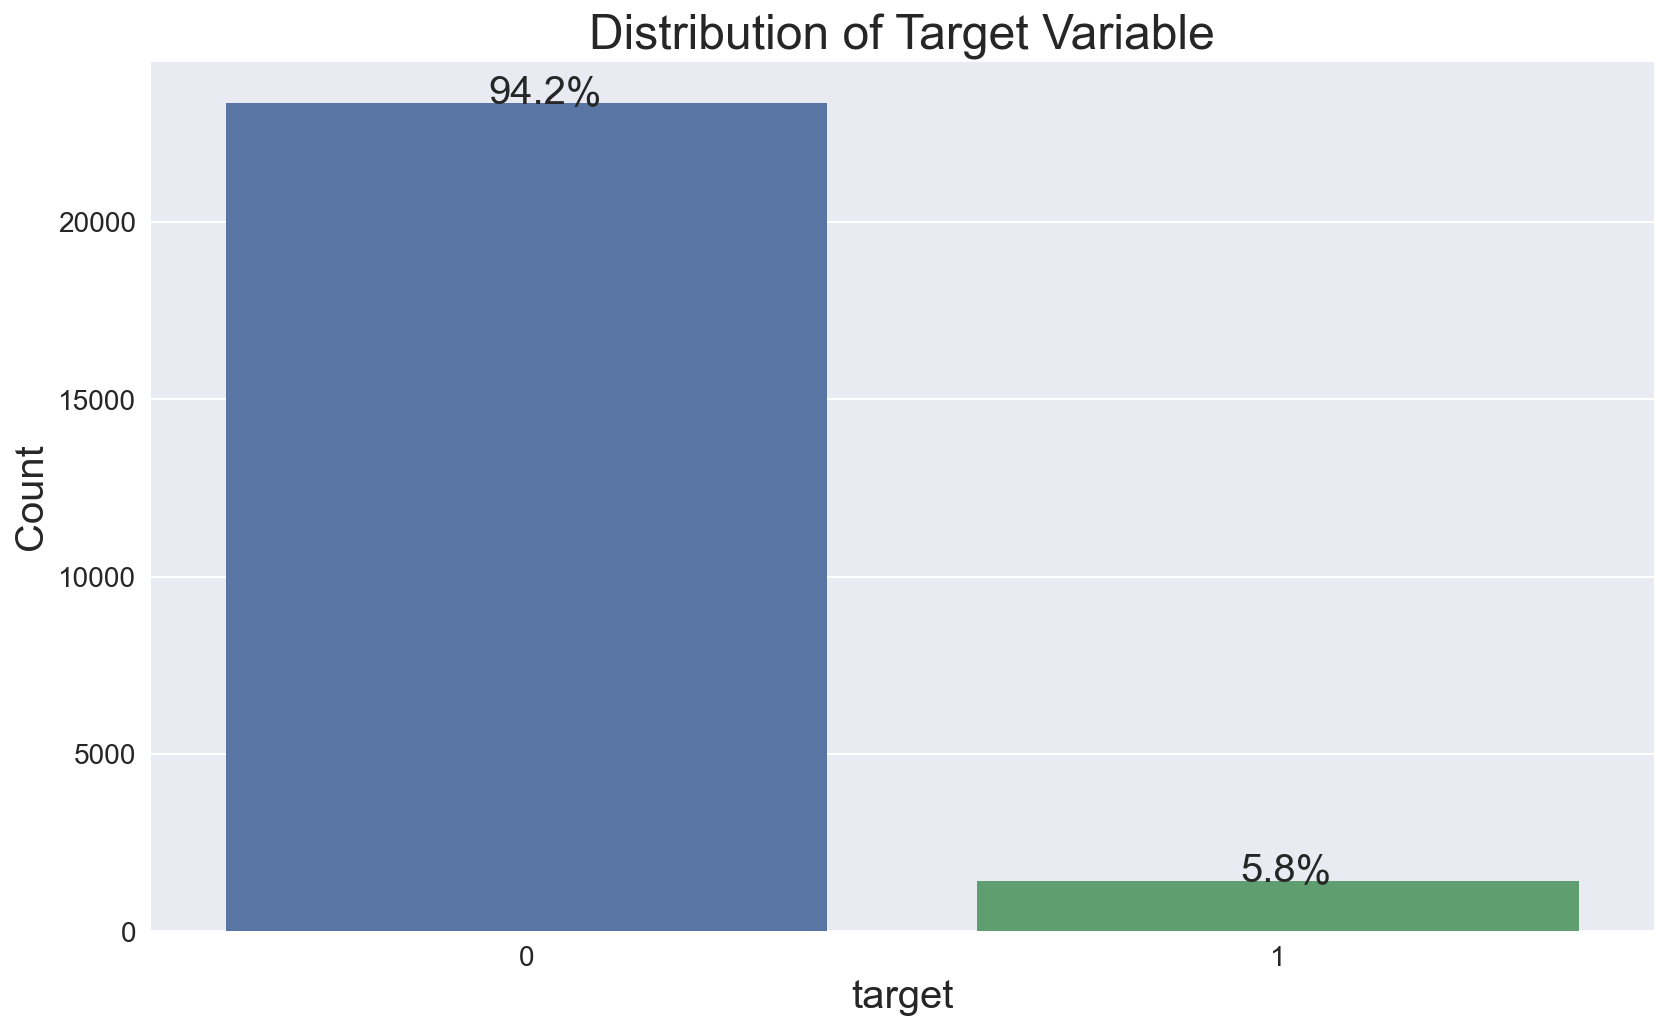

In [7]:
# create visualization for new target variable distribution
def barplot(df, feature, title):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.countplot(x=feature, data=df, ax=ax)
    plt.title(title, fontsize=24)
    plt.xlabel("target", fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    total = len(df.target)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=20)
    fig.show()
    fig.savefig("images/target_distribution.png")

plt.style.use('seaborn')
barplot(df2, 'target', 'Distribution of Target Variable')

In [8]:
# display first few tweets
df.tweet.head(30)

0     !!! RT @mayasolovely: As a woman you shouldn't...
1     !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2     !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3     !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4     !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5     !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...
6     !!!!!!"@__BrighterDays: I can not just sit up ...
7     !!!!&#8220;@selfiequeenbri: cause I'm tired of...
8     " &amp; you might not get ya bitch back &amp; ...
9     " @rhythmixx_ :hobbies include: fighting Maria...
10    " Keeks is a bitch she curves everyone " lol I...
11                   " Murda Gang bitch its Gang Land "
12    " So hoes that smoke are losers ? " yea ... go...
13        " bad bitches is the only thing that i like "
14                              " bitch get up off me "
15                      " bitch nigga miss me with it "
16                               " bitch plz whatever "
17                            " bitch who do you

## Word Count Per Tweet

In [9]:
# create functions to count number of words in tweet
def num_of_words(df, col):
    df['word_ct'] = df[col].apply(lambda x: len(str(x).split(" ")))
    print(df[[col, 'word_ct']])

num_of_words(df, 'tweet')

                                                   tweet  word_ct
0      !!! RT @mayasolovely: As a woman you shouldn't...       25
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...       16
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...       21
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...        9
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...       26
...                                                  ...      ...
25291  you's a muthaf***in lie &#8220;@LifeAsKing: @2...       19
25292  you've gone and broke the wrong heart baby, an...       13
25294  young buck wanna eat!!.. dat nigguh like I ain...       13
25295              youu got wild bitches tellin you lies        7
25296  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...       18

[24783 rows x 2 columns]


In [10]:
# create visualization for word count distribution
df['word_ct'].iplot(
    kind='hist',
    bins=40,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Word Count Distribution')

## Number of Characters Per Tweet

In [11]:
# create function to ccount number of characters in a tweet
def num_of_chars(df, col):
    df['char_ct'] = df[col].str.len()
    print(df[[col, 'char_ct']])

num_of_chars(df, 'tweet')

                                                   tweet  char_ct
0      !!! RT @mayasolovely: As a woman you shouldn't...      140
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...       85
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...      120
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...       62
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...      137
...                                                  ...      ...
25291  you's a muthaf***in lie &#8220;@LifeAsKing: @2...      146
25292  you've gone and broke the wrong heart baby, an...       70
25294  young buck wanna eat!!.. dat nigguh like I ain...       67
25295              youu got wild bitches tellin you lies       37
25296  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...      127

[24783 rows x 2 columns]


In [12]:
# create visualization to display character count distribution
df['char_ct'].iplot(
    kind='hist',
    bins=100,
    xTitle='character count',
    linecolor='black',
    yTitle='count',
    title='Character Count Distribution')

## Average Word Length Per Tweet

In [13]:
# create function to calculate average word length and then average word length per tweet
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

def avg_word_length(df, col):
    df['avg_wrd'] = df[col].apply(lambda x: avg_word(x))
    print(df[[col, 'avg_wrd']].head())

avg_word_length(df, 'tweet')

                                               tweet   avg_wrd
0  !!! RT @mayasolovely: As a woman you shouldn't...  4.640000
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  4.375000
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  4.761905
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  6.000000
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  4.307692


In [14]:
# create visualization for average word length distribution
df['avg_wrd'].iplot(
    kind='hist',
    bins=60,
    xTitle='average word length',
    linecolor='black',
    yTitle='count',
    title='Average Word Length Distribution')

## Hashtags Count

In [15]:
# create function to count number of hashtags per tweet
def hash_ct(df, col):
    df['hash_ct'] = df[col].apply(lambda x: len(re.split(r'#', str(x)))-1)
    print(df[[col, 'hash_ct']].head())

hash_ct(df, 'tweet')

                                               tweet  hash_ct
0  !!! RT @mayasolovely: As a woman you shouldn't...        0
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...        0
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...        0
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...        0
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...        1


In [16]:
# create visualization for displaying hashtag distribution 
df['hash_ct'].iplot(
    kind='hist',
    bins=100,
    xTitle='hashtags count',
    linecolor='black',
    yTitle='count',
    title='Number of Hashtags Distribution')

## Data Preprocessing:

What are the challenges in dealing with tweets:

1. Inconsistent use of grammar, proper spelling, punctuation, and capitalization
2. Repetition of same ch1aracter, and use of random abbreviations makes tokenization and POS tagging difficult
3. Use of special characters, i.e. emojis, emoticons, hashtags


Here I have defined the techniques used in preprocessing tweets:

- **Letter casing:** Converting all letters to either upper case or lower case.
- **Tokenizing:** Separating piece of text into tokens most often into individual words based on the separating spaces as delimiter, but can be performed on the word, character or subword level
- **Noise removal:**
    - Eliminating unwanted characters, such as HTML tags, punctuation marks, special characters, white spaces, etc.
- **Stopword removal:**
    - Some words do not contribute much to the machine learning model, so it's good to remove them. 
    - A list of stopwords can be defined by the nltk library, or it can be business-specific.
- **Normalization:**
    - Generally refers to a series of related tasks meant to put all text on the same level
    - Converting text to lower case, removing special characters, and removing stopwords will remove basic inconsistencies
    - improves text matching
- **Stemming or Lemmatization:**
    - Eliminating affixes (circumfixes, suffixes, prefixes, infixes) from word in order to obtain word stem and generally chops off end of words, where Porter Stemmer is the most widely used technique 
    - Goal is same as with stemming, but while stemming can cause loss of actual meaning of word
    - returns base or dictionary form of word, also known as lemma
- **Vectorization:**
    - process of converting tokens to numbers since machine learning algorithm works with numbers and not text
    - such as vectorization using tf-idf, or Bag of Words and N-grams

Since there is so much colloquial use of words amongst tweets, we did not anticipate that stemming or lemmatization to have a significant impact on the predictive value of the model. 

In [17]:
# create function to preprocess tweets
def preprocess_tweets(df, col):
    """master function to preprocess tweets"""
    collect_and_remove_users(df, col)
    collect_and_remove_charef(df, col)
    collect_and_remove_hashtags(df, col)
    remove_links(df, col)
    remove_av_qt(df, col)
    remove_punctuation(df, col)
    lowercasing(df, col)
    remove_whitespaces(df, col)
    remove_numerics(df, col)
    tokenize_and_lemmatize(df, col)

preprocess_tweets(df, 'tweet')



Here is the thought process involved with each of the specific steps we identified working with the dataset to prepare the data for the modeling process:

- We removed callouts or usernames, which is preceded by @.  They contain no useful information.
- We removed character references, which includes HTML character references, but also emojis, unicode characters. We decided not to convert any emojis into sentiment words.
- We removed the hash from the hashtags and decided to keep the hashtag text because they are often words or word-like and are used to connect similar ideas across the platform.  We could analyze the hashtags in a future project.
- We removed the Twitter codes RT and QT for retweet and quotetweet.  We decided to keep the retweeted words, as it conveys important information while others have removed all the text after RT.
- We removed the HTML links since a lot of users link a website reference as part of the tweet.
- We then removed any punctuation. We did not convert contractions into the uncontracted words.
- We then lowercased all the tweets for tokenizing.
- We removed any numbers and number containing words for tokenization and vectorizing.
- We removed any extra whitespace(s) between words and any leading and trailing whitespaces.

Additional steps before modeling includes stopword removal, tokenization, lemmatizing, stemming, and/or vectorizing.

In [18]:
# display first five rows of dataframe
df.head()

count  hate  offensive  neutral  target  \
0      3     0          0        3       2   
1      3     0          3        0       1   
2      3     0          3        0       1   
3      3     0          2        1       1   
4      6     0          6        0       1   

                                               tweet  word_ct  char_ct  \
0  [woman, shouldnt, complain, clean, house, man,...       25      140   
1  [boy, dats, coldtyga, dwn, bad, cuffin, dat, h...       16       85   
2          [dawg, fuck, bitch, start, confuse, shit]       21      120   
3                               [look, like, tranny]        9       62   
4             [shit, hear, true, faker, bitch, tell]       26      137   

    avg_wrd  hash_ct              retweets         callouts     charref  \
0  4.640000        0    'RT @mayasolovely'                      '&amp;'   
1  4.375000        0         'RT @mleew17'                                
2  4.761905        0   'RT @UrKindOfBrand'  '@80sbaby4life'               
3  6.000000        0    'RT @C_G_Anderson'    '@viva_based'               
4  4.307692        1  'RT @ShenikaRoberts'                   '&#57361;'   

  hashtags  
0           
1           
2           
3           
4

In [19]:
# send dataframe file to excel file for Tableau evaluation
#df.to_excel(r'/Volumes/My Passport for Mac/Dropbox/Data Science/VSCode/Repositories/Automated-Hate-Tweet-Detection/data/tableau.xlsx', index=False)

## Assigning Target Variable

In [32]:
# make copy of dataframe
df2 = df.copy()

In [33]:
# get counts of target variable
df2['target'].value_counts()

1    19190
2     4163
0     1430
Name: target, dtype: int64

In [34]:
# combine offensive and neutral categories by assigning them the same tag
df2['target'] = df2['target'].replace([2], 1)
df2['target'].value_counts()

1    23353
0     1430
Name: target, dtype: int64

In [35]:
# switch hate category to the positive category and non-hate to the negative 
df2.target = df2.target.replace([0, 1], [1, 0])
df2.target.value_counts()

0    23353
1     1430
Name: target, dtype: int64

In [36]:
df2.head()

count  hate  offensive  neutral  target  \
0      3     0          0        3       0   
1      3     0          3        0       0   
2      3     0          3        0       0   
3      3     0          2        1       0   
4      6     0          6        0       0   

                                               tweet  word_ct  char_ct  \
0  [woman, shouldnt, complain, clean, house, man,...       25      140   
1  [boy, dats, coldtyga, dwn, bad, cuffin, dat, h...       16       85   
2          [dawg, fuck, bitch, start, confuse, shit]       21      120   
3                               [look, like, tranny]        9       62   
4             [shit, hear, true, faker, bitch, tell]       26      137   

    avg_wrd  hash_ct              retweets         callouts     charref  \
0  4.640000        0    'RT @mayasolovely'                      '&amp;'   
1  4.375000        0         'RT @mleew17'                                
2  4.761905        0   'RT @UrKindOfBrand'  '@80sbaby4life'               
3  6.000000        0    'RT @C_G_Anderson'    '@viva_based'               
4  4.307692        1  'RT @ShenikaRoberts'                   '&#57361;'   

  hashtags  
0           
1           
2           
3           
4

In [37]:
# separate dataframe into respective classes
hate = df2[df2.target == 1]
non_hate = df2[df2.target == 0]

## Train-Validation-Test Split

In [38]:
# separate features from target variable for train_test_splt
X_h = hate.tweet
y_h = hate.target
X_nh = non_hate.tweet
y_nh = non_hate.target

# perform 75-25 training-validation split and 15-10 validation-testing split on dataset
X_h_tr, X_h_val, y_h_tr, y_h_val = train_test_split(X_h, y_h, test_size=0.25, random_state=42)
X_h_val, X_h_tt, y_h_val, y_h_tt = train_test_split(X_h_val, y_h_val, test_size=0.4, random_state=42)
X_nh_tr, X_nh_val, y_nh_tr, y_nh_val = train_test_split(X_nh, y_nh, test_size=0.25, random_state=42)
X_nh_val, X_nh_tt, y_nh_val, y_nh_tt = train_test_split(X_nh_val, y_nh_val, test_size=0.4, random_state=42)

In [39]:
# concatenate hate and non-hate dataframe to reform entire training dataset
X_tr = pd.concat((X_h_tr, X_nh_tr), ignore_index=True)
y_tr = pd.concat((y_h_tr, y_nh_tr), ignore_index=True)
train = pd.concat([X_tr, y_tr], axis=1)

# remove brackets around the list to create a list of strings
train['tweet2'] = train.tweet.apply(lambda x: str(x)[1:-1]) 
train.head()

tweet  target  \
0  [reject, constantly, house, threaten, rape, mo...       1   
1  [convince, lame, nigger, liver, believe, cuz, ...       1   
2  [peace, fag, remember, best, lux, support, dro...       1   
3                    [haha, ight, nig, calm, yoself]       1   
4  [tits, better, look, face, make, like, asian, ...       1   

                                              tweet2  
0  'reject', 'constantly', 'house', 'threaten', '...  
1  'convince', 'lame', 'nigger', 'liver', 'believ...  
2  'peace', 'fag', 'remember', 'best', 'lux', 'su...  
3            'haha', 'ight', 'nig', 'calm', 'yoself'  
4  'tits', 'better', 'look', 'face', 'make', 'lik...

In [40]:
# concatenate hate and non-hate dataframes to reform entire validation dataset
X_val = pd.concat((X_h_val, X_nh_val), ignore_index=True)
y_val = pd.concat((y_h_val, y_nh_val), ignore_index=True)
val = pd.concat([X_val, y_val], axis=1)

# remove brackets around the list to create a list of string
val['tweet2'] = val.tweet.apply(lambda x: str(x)[1:-1]) 
val.head()

tweet  target  \
0  [lbum, fotos, gaywrites, make, project, queer,...       1   
1  [yay, america, israel, jew, hat, muslim, trash...       1   
2  [miss, ofay, friends, day, scar, recent, happe...       1   
3     [trash, darkskin, nigga, steal, damn, garbage]       1   
4      [cody, call, people, nigger, hes, fuck, spaz]       1   

                                              tweet2  
0  'lbum', 'fotos', 'gaywrites', 'make', 'project...  
1  'yay', 'america', 'israel', 'jew', 'hat', 'mus...  
2  'miss', 'ofay', 'friends', 'day', 'scar', 'rec...  
3  'trash', 'darkskin', 'nigga', 'steal', 'damn',...  
4  'cody', 'call', 'people', 'nigger', 'hes', 'fu...

In [41]:
X_tt = pd.concat((X_h_tt, X_nh_tt), ignore_index=True)
y_tt = pd.concat((y_h_tt, y_nh_tt), ignore_index=True)
test = pd.concat([X_tt, y_tt], axis=1)

# remove brackets around the list to create a list of string
test['tweet2'] = test.tweet.apply(lambda x: str(x)[1:-1]) 
test.head()

tweet  target  \
0                       [johnny, rebel, nigger, day]       1   
1  [favorite, nigger, work, plantation, remember,...       1   
2  [go, prestigious, establishments, clearly, sup...       1   
3                       [westvirginia, white, trash]       1   
4  [fuck, brett, farve, redneck, ass, stuckup, do...       1   

                                              tweet2  
0                 'johnny', 'rebel', 'nigger', 'day'  
1  'favorite', 'nigger', 'work', 'plantation', 'r...  
2  'go', 'prestigious', 'establishments', 'clearl...  
3                   'westvirginia', 'white', 'trash'  
4  'fuck', 'brett', 'farve', 'redneck', 'ass', 's...

## Frequency Distributions

In [42]:
# plt.rcParams['xtick.labelsize'] = 18
# plt.rcParams['ytick.labelsize'] = 18

In [43]:
# split back into minority and majority classes for visualizations
zero = train[train.target == 0]
one = train[train.target == 1]


In [44]:
# create list of tokens for 

zero_tokens = []
for index, row in zero.iterrows():
    zero_tokens.extend(row['tweet'])

one_tokens = []
for index, row in one.iterrows():
    one_tokens.extend(row['tweet'])

In [ ]:
# convert collection of text documents to matrix of token counts
vec = CountVectorizer()
# learn vocabulary dictionary to return document-term matrix
docs = vec.fit_transform(zero_tokens)
# array mapping from feature integer indices to feature name
features = vec.get_feature_names()

# use Yellowbrick implementation of visualizing token frequency distribution
visualizer = FreqDistVisualizer(features=features, orient='h', n=25, size=(1080, 720), color='tab:blue')
visualizer.fit(docs)
custom_viz = visualizer.ax
custom_viz.set_xlabel('Number of Tokens', fontsize=24)
custom_viz.set_ylabel('Token', fontsize=24)
custom_viz.set_title("Frequency Distribution of Top 25 Tokens for Non-Hate Tweets", fontsize=30)
custom_viz.figure.show()

<img src="images/freq_dist_zero.png">

Some of the top phrases in the negative class are: 'bitch', 'hoe', 'pussy', 'fuck', 'nigga'.  'Bitch' , 'fuck', and 'nigga' are 'Hoe' and 'pussy' appears in less frequency in the positive class.  

Notably, 'nigger', 'white', 'trash', 'retard', 'queer', 'gay', 'fag' and 'faggot' are almost exclusively in the positive class.

In [ ]:
# create visualization for positive class
vec = CountVectorizer()
docs = vec.fit_transform(one_tokens)
features = vec.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='h', size=(1080, 720), color='tab:orange')
visualizer.fit(docs)
custom_viz = visualizer.ax
custom_viz.set_xlabel('Number of Tokens', fontsize=24) 
custom_viz.set_ylabel('Token', fontsize=24)
custom_viz.set_title("Frequency Distribution of Top 25 Tokens for Hate Tweets", fontsize=30)
custom_viz.figure.show()

<img src="images/freq_dist_one.png">

## TSNE

In [ ]:
tfidf = TfidfVectorizer()
X_zero = tfidf.fit_transform(zero.tweet2)
y_zero = train.target

visualizer = TSNEVisualizer()
visualizer.fit(X_zero, y_zero, alpha=0.1, decompose='svd')
visualizer.show(outpath="images/tsne_zero.png")

In [ ]:
tfidf = TfidfVectorizer()
X_one = tfidf.fit_transform(one.tweet2)
y_one = train.target

visualizer = TSNEVisualizer().fit(X_one, y_one, alpha=0.6, decompose='svd')
visualizer.show(outpath="images/tsne_one.png")

<img src="images/tsne_zero.png">
<img src="images/tsne_one.png">

There is still strong overlap between the two classes as evinced by the diagrams. But there are clusters at the extremes (topmost, bottommost, far left, far right) that appear in the minority class TSNE that does not seem to appear in the majoity class.

## Wordcloud

(-0.5, 399.5, 199.5, -0.5)

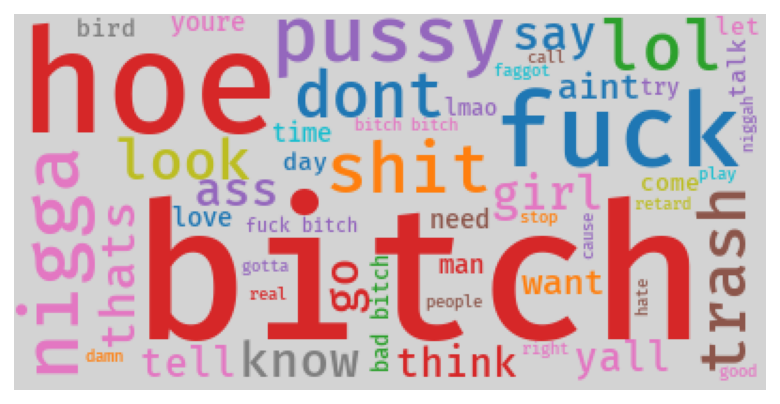

In [72]:
text = ' '.join(zero_tokens)

# Initialize wordcloud object
wc = WordCloud(font_path="/Users/examsherpa/Library/Fonts/FiraMono-Medium.ttf", background_color='lightgray', colormap='tab10', max_words=50)

# Generate and plot wordcloud
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

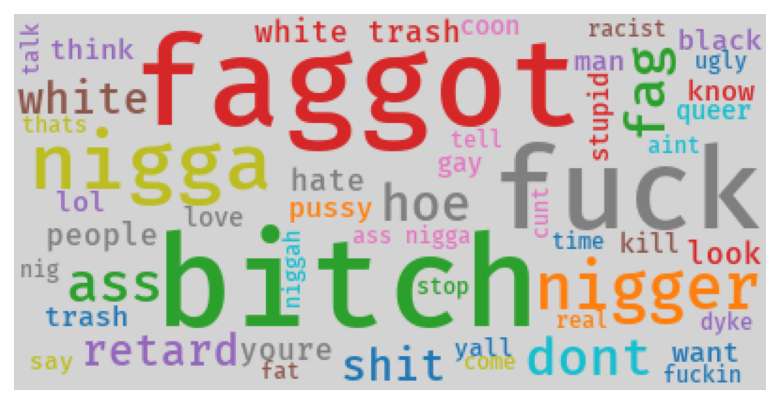

In [73]:
text = ' '.join(one_tokens)

# Initialize wordcloud object
wc = WordCloud(font_path="/Users/examsherpa/Library/Fonts/FiraMono-Medium.ttf", background_color='lightgray', colormap='tab10', max_words=50)

# Generate and plot wordcloud
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()

The traditional epithets are not found in exclusively in the hate category, only the less traditional words often in the form of hashtags can be found exclusively as hate speech.  That would make sense. in terms pf

- sexual orientation:  teabagged, girlboy, azflooding, azmonsoon, molester, cousintoucher, theyfaggots, dicklicker
- sex:  wenchs
- race/ethnicity/religion:  osamas, spicskkk, niggerous, nigglets. nigress, ovenjew, westvirginia, texarkana, ching, chong, maoists, mexicannigger

One clear distinction is the difference in use of nigga versus the n word.  When people say the f word against homosexuals, it is more often in the derogatory sense.  The p word can be just offensive or sexist, i.e. males use the p word to denigrate guys, which can be offensive but not considered hate speech. 

# Modeling Process:

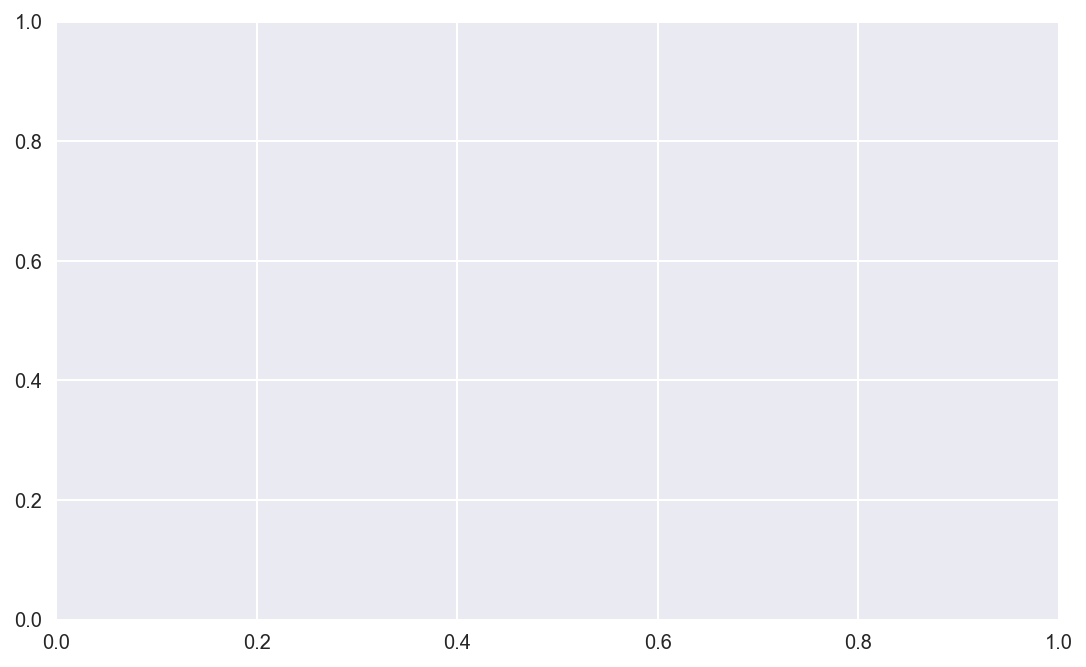

In [46]:
X_tr = train.tweet2
X_val = val.tweet2
y_tr = train.target
y_val = val.target
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_tr)
tfidf_val = vec.transform(X_val)

## Multinomial Naive Bayes

Accuracy:  0.9426957223567393
F1 Score:  0.009302325581395347
ROC-AUC:  0.7177479383492388
Recall:  0.004672897196261682
Precision:  1.0
PR-AUC:  0.17675788857212738


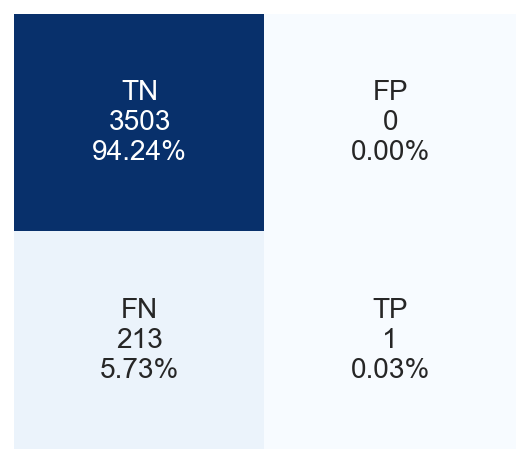

In [47]:
nb = MultinomialNB().fit(tfidf_tr, y_tr)
y_pred_nb = nb.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pred_nb, nb)


## Random Forest

Accuracy:  0.9429647565240785
F1 Score:  0.17829457364341086
ROC-AUC:  0.8341601724556521
Recall:  0.10747663551401869
Precision:  0.5227272727272727
PR-AUC:  0.3320729281556375


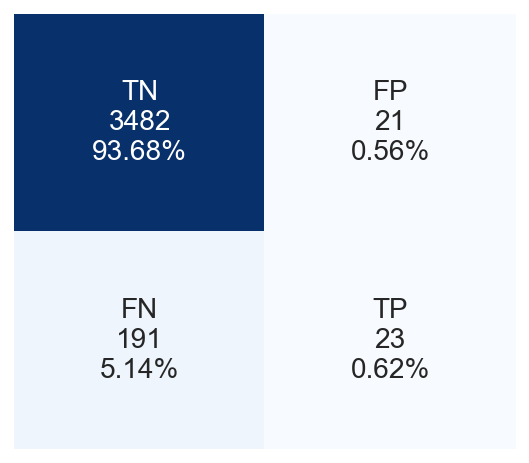

In [48]:
rf = RandomForestClassifier(n_estimators=100).fit(tfidf_tr, y_tr)
y_pred_rf = rf.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pred_rf, rf)

## Logistic Regression

Accuracy:  0.9443099273607748
F1 Score:  0.20077220077220076
ROC-AUC:  0.8743293465414158
Recall:  0.12149532710280374
Precision:  0.5777777777777777
PR-AUC:  0.355640424831512


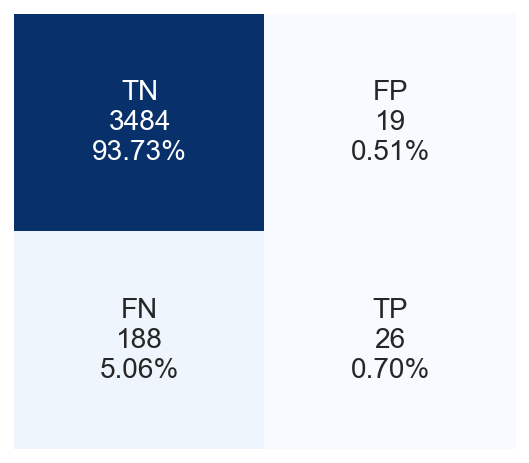

In [49]:
log = LogisticRegression().fit(tfidf_tr, y_tr)
y_pred_log = log.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pred_log, log)

## Support Vector Machine

In [50]:
svc = svm.LinearSVC(random_state=42).fit(tfidf_tr, y_tr)
y_pred_svc = svc.predict(tfidf_val)
get_metrics_2(tfidf_val, y_val, y_pred_svc, svc)

Accuracy:  0.9391982781813291
F1:  0.2709677419354839
Recall:  0.19626168224299065
Precision:  0.4375
PR-AUC:  0.32508683821796447


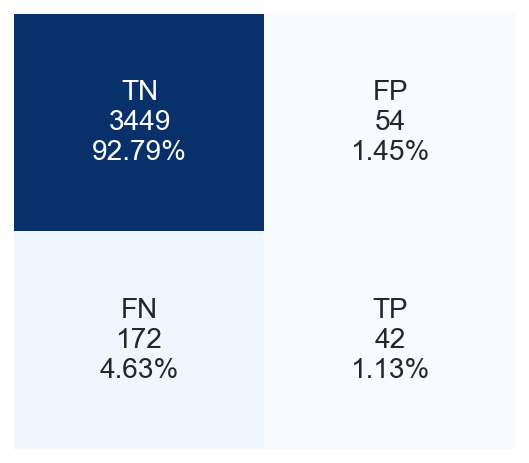

In [51]:
get_confusion(y_val, y_pred_svc)

## Adaboost

Accuracy:  0.9408124831853646
F1 Score:  0.27152317880794696
ROC-AUC:  0.8074267450329624
Recall:  0.19158878504672897
Precision:  0.4659090909090909
PR-AUC:  0.2970758953330604


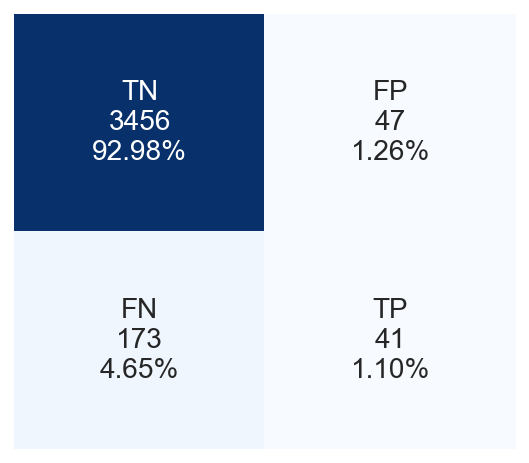

In [52]:
abc = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
    ).fit(tfidf_tr, y_tr)
y_pred_abc = abc.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pred_abc, abc)

## Gradient Boosting

Accuracy:  0.9424266881894
F1 Score:  0.17054263565891473
ROC-AUC:  0.8384542221487056
Recall:  0.102803738317757
Precision:  0.5
PR-AUC:  0.34600315497228307


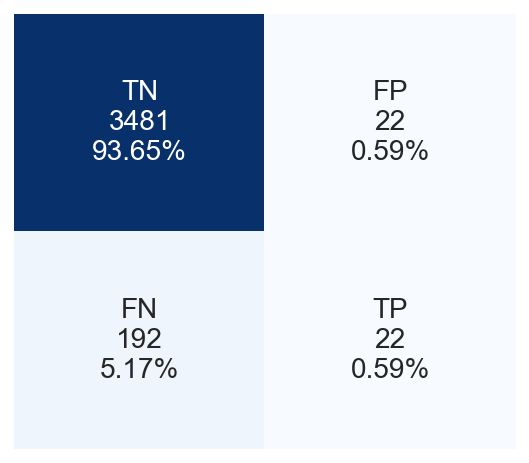

In [53]:
gbc = GradientBoostingClassifier().fit(tfidf_tr, y_tr)
y_pred_gbc = gbc.predict(tfidf_val)
get_metrics_confusion(tfidf_val, y_val, y_pred_gbc, gbc)

In [78]:
metrics = pd.read_csv("data/metrics.csv")
metrics

Unnamed: 0  Accuracy  F1 Score    Recall  Precision  \
0       Multinomial Naive Bayes  0.942696  0.009302  0.004673   1.000000   
1                 Random Forest  0.941620  0.168582  0.102804   0.468085   
2           Logistic Regression  0.944310  0.200772  0.121495   0.577778   
3        Support Vector Machine  0.939198  0.270968  0.196262   0.437500   
4           AdaBoost Classifier  0.940543  0.270627  0.191589   0.460674   
5  Gradient Boosting Classifier  0.942965  0.184615  0.112150   0.521739   

    ROC-AUC    PR-AUC  
0  0.717748  0.176758  
1  0.842541  0.321484  
2  0.874329  0.355640  
3  0.836493  0.325087  
4  0.814550  0.297494  
5  0.838608  0.349449

# Class Imbalance

## Resampling Methods

I picked an undersampling, oversampling, and combined resampling method to address the class imbalance:

1. Random Under Sampler
2. Condensed Nearest Neighbor
3. SMOTE-ENN



### Random Under Sampler

Baseline is 17514 members for class 0 and 1072 for class 1.

RUS undersampled the majority class until the two classes were equal in number, essentially 1072 for each.

In [76]:
metrics2 = pd.read_csv("data/metrics2.csv")
metrics2

Unnamed: 0  Accuracy  F1 Score    Recall  Precision  \
0       RUS Multinomial Naive Bayes  0.710519  0.240113  0.794393   0.141431   
1                 RUS Random Forest  0.814904  0.318812  0.752336   0.202261   
2           RUS Logistic Regression  0.824052  0.332653  0.761682   0.212794   
3        RUS Support Vector Machine  0.787732  0.288548  0.747664   0.178771   
4           RUS AdaBoost Classifier  0.768362  0.267234  0.733645   0.163371   
5  RUS Gradient Boosting Classifier  0.841808  0.331818  0.682243   0.219219   

    ROC-AUC    PR-AUC  
0  0.838390  0.329976  
1  0.859188  0.315360  
2  0.865465  0.331852  
3  0.848584  0.309002  
4  0.814391  0.266228  
5  0.849260  0.328457

### Condensed Nearest Neighbor

CNN undersamples the majority class by keeping only instances from the majority class that cannot be classified using the KNN algorithm.  An odd number is ideal to use since classification is determined by majority vote.  It keeps all members of the minority class.

It results in 1239 members of majority and 1072 members of the minority class.

In [106]:
metrics3 = pd.read_csv("data/metrics3.csv")
metrics3

Unnamed: 0  Accuracy  F1 Score    Recall  Precision  \
0       CNN Multinomial Naive Bayes  0.869518  0.323570  0.542056   0.230616   
1                 CNN Random Forest  0.887006  0.371257  0.579439   0.273128   
2           CNN Logistic Regression  0.891579  0.386606  0.593458   0.286682   
3        CNN Support Vector Machine  0.844767  0.317160  0.626168   0.212361   
4           CNN AdaBoost Classifier  0.813021  0.278297  0.626168   0.178905   
5  CNN Gradient Boosting Classifier  0.890772  0.381098  0.584112   0.282805   

    ROC-AUC    PR-AUC  
0  0.796428  0.271775  
1  0.833921  0.301401  
2  0.861070  0.319381  
3  0.826500  0.252725  
4  0.781618  0.187342  
5  0.842994  0.293065

### SMOTE-ENN

Combines oversampling with SMOTE and undersampling with ENN.  ENN (Edited Nearest Neighbor) finds the K-nearest neighbor of each observation and compares the majority class from nearest neighbor to the observation.  When they differ, both the observation and the K-nearest neighbor are removed.

SMOTE (Synthetic Minority Oversampling Technique) is an oversampling method that generates synthetic minority instances by interpolating them between two minority classes that are nearest neighbors.

In [79]:
metrics4 = pd.read_csv("data/metrics4.csv")
metrics4

Unnamed: 0  Accuracy  F1 Score    Recall  \
0       Sm-ENN Multinomial Naive Bayes  0.793113  0.269706  0.663551   
1                 Sm-ENNR andom Forest  0.929244  0.427015  0.457944   
2           Sm-ENN Logistic Regression  0.793113  0.269706  0.663551   
3        Sm-ENN Support Vector Machine  0.887813  0.355487  0.537383   
4           Sm-ENN AdaBoost Classifier  0.882432  0.360176  0.574766   
5  Sm-ENN Gradient Boosting Classifier  0.887006  0.376855  0.593458   

   Precision   ROC-AUC    PR-AUC  
0   0.169249  0.797770  0.296334  
1   0.400000  0.865129  0.327962  
2   0.169249  0.854613  0.317006  
3   0.265589  0.823857  0.294173  
4   0.262260  0.842466  0.298775  
5   0.276087  0.849248  0.325147

## Additional Datasets

### Aristotle University Dataset

In [32]:
# upload dataset
df = pd.read_csv('data/hatespeechtwitter.csv')
df.head()

tweet_id maj_label
0  849667487180259329   abusive
1  850490912954351616   abusive
2  848791766853668864   abusive
3  848306464892604416   abusive
4  850010509969465344    normal

In [33]:
# get value counts for target variable categories
df.columns = ['id', 'label']
df.label.value_counts()

normal     52835
spam       13404
abusive    10122
hateful     3635
Name: label, dtype: int64

In [34]:
# get tweet IDs into form to insert into API
df_hateful = df[df['label']=='hateful']
hate_ids = group_list(list(df_hateful.id))
len(hate_ids)

37

### Twitter API

In [15]:
# setup url and headers for calling Twitter API as per documentation
url = "https://api.twitter.com/2/tweets?ids=847661947159891972,847799130277675008,848933211375779840&tweet.fields=created_at,entities,geo,id,public_metrics,text&user.fields=description,entities,id,location,name,public_metrics,username"
payload={}
headers = {'Authorization': 'Bearer ' + keys['bearer_token'], 'Cookie': 'personalization_id="v1_hzpv7qXpjB6CteyAHDWYQQ=="; guest_id=v1%3A161498381400435837'}

# make GET request to Twitter API to get response object 
r = requests.request("GET", url, headers=headers, data=payload)

# convert payload to dictionary
data = r.json()

In [84]:
df_hate = tweets_request(hate_ids)
df_hate.head(10)

100%|██████████| 37/37 [00:23<00:00,  1.60it/s]


public_metrics  \
0  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
1  {'retweet_count': 5, 'reply_count': 0, 'like_c...   
2  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
3  {'retweet_count': 0, 'reply_count': 1, 'like_c...   
4  {'retweet_count': 5, 'reply_count': 0, 'like_c...   
5  {'retweet_count': 913, 'reply_count': 0, 'like...   
6  {'retweet_count': 0, 'reply_count': 0, 'like_c...   
7  {'retweet_count': 6094, 'reply_count': 0, 'lik...   
8  {'retweet_count': 18, 'reply_count': 0, 'like_...   
9  {'retweet_count': 2, 'reply_count': 0, 'like_c...   

                 created_at                  id  \
0  2017-04-07T19:42:40.000Z  850433664890544128   
1  2017-04-06T21:39:45.000Z  850100742035836929   
2  2017-03-31T13:35:20.000Z  847804507367100416   
3  2017-04-06T20:58:20.000Z  850090319165050880   
4  2017-04-03T00:00:48.000Z  848686686930382848   
5  2017-04-07T16:11:57.000Z  850380636300820480   
6  2017-03-31T03:33:05.000Z  847652946217009155   
7  2017-04-03T09:52:55.000Z  848835698006401024   
8  2017-04-07T05:17:15.000Z  850215875680522240   
9  2017-04-06T09:53:03.000Z  849922895132459008   

                                                text  \
0  I hate er chase because if the Bitch that work...   
1  RT @nyctophil3: Pineapples do not belong on pi...   
2  Niggas keep talking about women wearing weave ...   
3  @vappywave idiot that's not gonna work. you go...   
4  RT @ayevonnn: bruh i fucking hate people like ...   
5  RT @mattmfm: I'm really fucking sick of watchi...   
6  @JayFoee_ just another dumbass bronco fan swea...   
7  RT @THESLUMPGOD: I Sampled Jaws \n\nPull Up Wi...   
8  RT @arianam0lina: if you litter you're a bitch...   
9  RT @cybeque: Don't take out the anger of being...   

                                            entities  geo  
0                                                NaN  NaN  
1  {'mentions': [{'start': 3, 'end': 14, 'usernam...  NaN  
2                                                NaN  NaN  
3  {'mentions': [{'start': 0, 'end': 10, 'usernam...  NaN  
4  {'urls': [{'start': 53, 'end': 76, 'url': 'htt...  NaN  
5  {'annotations': [{'start': 53, 'end': 68, 'pro...  NaN  
6                                                NaN  NaN  
7  {'mentions': [{'start': 3, 'end': 15, 'usernam...  NaN  
8  {'mentions': [{'start': 3, 'end': 16, 'usernam...  NaN  
9  {'urls': [{'start': 74, 'end': 97, 'url': 'htt...  NaN

In [35]:
df_1 = pickle.load(open("pickle/aristotle_hate.pickle", "rb"))
df_1['target'] = 1
preprocess_tweets(df_1, 'text')
df_1 = df_1[['text', 'target']]
df_1.head()

text  target
0  [hate, chase, bitch, work, shes, literally, evil]       1
1   [pineapples, belong, pizza, yall, niggas, nasty]       1
2  [niggas, talk, women, wear, weave, sick, bitch...       1
3  [idiot, thats, gonna, work, gotta, flame, stic...       1
4                   [bruh, fuck, hate, people, like]       1

### University of Copenhagen Dataset

In [36]:
df2 = pd.read_csv('data/NAACL_SRW_2016.csv')
df2.columns = ['id', 'label']

In [37]:
df2.label.value_counts()

none      11559
sexism     3378
racism     1969
Name: label, dtype: int64

In [ ]:
racsex_id = group_list(list(df_racsex.id))
df_rac_sex = tweets_request(racsex_id)

In [38]:
df_2 = pickle.load(open("pickle/copenhagen_2.pickle", "rb"))
df_2['target'] = 1
preprocess_tweets(df_2, 'text')
df_2 = df_2[['text', 'target']]
df_2.head()

text  target
0      [drasko, didnt, cook, half, bird, idiot, mkr]       1
1                     [hopefully, cook, drasko, mkr]       1
2  [course, bear, serbiayoure, fuck, serbian, fil...       1
3  [girls, equivalent, irritate, asian, girls, co...       1
4          [youre, tiny, bite, racist, racist, dick]       1

## HASOC 2019 and 2020 Dataset

In [39]:
english = pd.read_csv("data/english_dataset.tsv", delimiter="\t")
df_3 = english[english['task_2'] == 'HATE']
df_3['target'] = 1
preprocess_tweets(df_3, 'text')
df_3 = df_3[['text', 'target']]
df_3.head()

text  target
1   [remember, clearly, admit, treason, trumpisatr...       1
11    [dont, know, compulsive, liar, trumpisatraitor]       1
23  [shameonicc, icc, dhonis, gloves, plan, world,...       1
27  [disgust, dont, change, culture, come, vet, pr...       1
34  [retire, nfl, players, dont, suffer, cte, pool...       1

## Original Dataset

In [40]:
df_4 = pd.read_csv("data/labeled_data.csv", index_col=0)
df_4 = df_4.drop(columns=['count', 'hate_speech', 'offensive_language', 'neither'], axis=1)
df_4.columns = ['target', 'text']
df_4 = df_4.replace({'target': {1: 0, 2: 0, 0: 1}})
preprocess_tweets(df_4, 'text')
df_4 = df_4[['target', 'text']]
df_4.head()

target                                               text
0       0  [woman, shouldnt, complain, clean, house, man,...
1       0  [boy, dats, coldtyga, dwn, bad, cuffin, dat, h...
2       0          [dawg, fuck, bitch, start, confuse, shit]
3       0                               [look, like, tranny]
4       0             [shit, hear, true, faker, bitch, tell]

## Combined Dataset

In [41]:
df_combined = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)
df_combined

text  target
0      [hate, chase, bitch, work, shes, literally, evil]       1
1       [pineapples, belong, pizza, yall, niggas, nasty]       1
2      [niggas, talk, women, wear, weave, sick, bitch...       1
3      [idiot, thats, gonna, work, gotta, flame, stic...       1
4                       [bruh, fuck, hate, people, like]       1
...                                                  ...     ...
30391  [yous, muthafin, lie, right, trash, bible, scr...       0
30392  [youve, go, break, wrong, heart, baby, drive, ...       0
30393  [young, buck, wanna, eat, dat, nigguh, like, a...       0
30394              [youu, get, wild, bitch, tellin, lie]       0
30395  [ruffle, ntac, eileen, dahlia, beautiful, colo...       0

[30396 rows x 2 columns]

In [42]:
df_combined.target.value_counts()

0    23353
1     7043
Name: target, dtype: int64

## Train-Validation-Test Split

In [43]:
# separate into hate and non-hate datasets
hate2 = df_combined[df_combined.target == 1]
non_hate2 = df_combined[df_combined.target == 0]

# separate into features and target for train_test_split
X_h2 = hate2.text
y_h2 = hate2.target
X_nh2 = non_hate2.text
y_nh2 = non_hate2.target

# perform 75-15-10 split on dataset
X_h_tr2, X_h_val2, y_h_tr2, y_h_val2 = train_test_split(X_h2, y_h2, test_size=0.25, random_state=42)
X_h_val2, X_h_tt2, y_h_val2, y_h_tt2 = train_test_split(X_h_val2, y_h_val2, test_size=0.4, random_state=42)
X_nh_tr2, X_nh_val2, y_nh_tr2, y_nh_val2 = train_test_split(X_nh2, y_nh2, test_size=0.25, random_state=42)
X_nh_val2, X_nh_tt2, y_nh_val2, y_nh_tt2 = train_test_split(X_nh_val2, y_nh_val2, test_size=0.4, random_state=42)

# concatenate to reform training dataset
X_tr2 = pd.concat((X_h_tr2, X_nh_tr2), ignore_index=True)
y_tr2 = pd.concat((y_h_tr2, y_nh_tr2), ignore_index=True)
train2 = pd.concat([X_tr2, y_tr2], axis=1)

# remove brackets on list to create list of strings
train2.text = train2.text.apply(lambda x: str(x)[1:-1]) 
train2.head()

# concatenate to reform validation dataset
X_val2 = pd.concat((X_h_val2, X_nh_val2), ignore_index=True)
y_val2 = pd.concat((y_h_val2, y_nh_val2), ignore_index=True)
val2 = pd.concat([X_val2, y_val2], axis=1)
val2.text = val2.text.apply(lambda x: str(x)[1:-1]) 
val2.head()

text  target
0  'kawhi', 'leonard', 'smh', 'wow', 'gonna', 'le...       1
1  'close', 'shop', 'feminism', 'roadblock', 'ega...       1
2    'mkr', 'wish', 'kat', 'sudden', 'death', 'stop'       1
3                     'sexist', 'stand', 'feminists'       1
4  'think', 'exact', 'word', 'know', 'carry', 'pa...       1

text  target
0           'america', 'white', 'trash', 'americans'       1
1  'literally', 'eat', 'asshole', 'live', 'actual...       1
2  'snipe', 'youre', 'fuck', 'faggot', 'fuck', 'h...       1
3  'goldbar', 'dumb', 'bitch', 'dad', 'wouldnt', ...       1
4  'bump', 'bitch', 'file', 'sexual', 'harassment...       1

In [44]:
# separate into feature and target variables
X_tr2 = train2.text
X_val2 = val2.text
y_tr2 = train2.target
y_val2 = val2.target


vec = TfidfVectorizer()
tfidf_tr2 = vec.fit_transform(X_tr2)
tfidf_val2 = vec.transform(X_val2)

In [25]:
dum_clf = DummyClassifier(strategy='most_frequent').fit(tfidf_tr2, y_tr2)
y_pr_clf = dum_clf.predict(tfidf_tr2)
get_metrics(tfidf_val2, y_val2, y_pr_clf, dum_clf)

ValueError: Found input variables with inconsistent numbers of samples: [4559, 22796]

Accuracy:  0.8646633033559992
F1 Score:  0.5927392739273927
ROC-AUC:  0.8989698494364138
Recall:  0.4251893939393939
Precision:  0.9782135076252724
PR-AUC:  0.8279656682191673


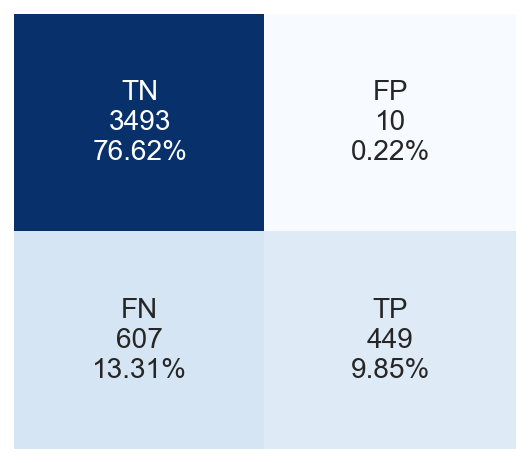

In [96]:
nb2 = MultinomialNB().fit(tfidf_tr2, y_tr2)
y_pr_nb_val2 = nb2.predict(tfidf_val2)
get_metrics_confusion(tfidf_val2, y_val2, y_pr_nb_val2, nb2)

Accuracy:  0.9032682605834613
F1 Score:  0.7675276752767528
ROC-AUC:  0.9396735968736755
Recall:  0.6893939393939394
Precision:  0.8656361474435196
PR-AUC:  0.8789905463539918


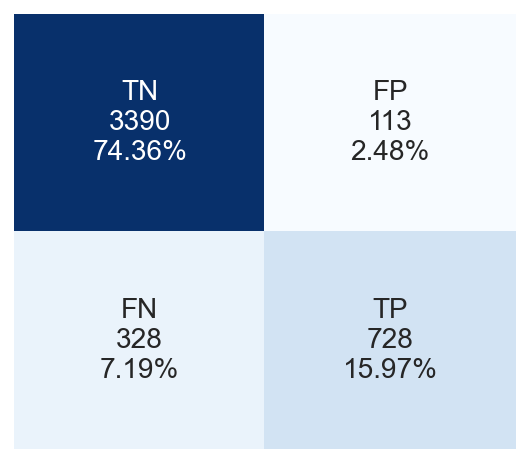

In [97]:
rf2 = RandomForestClassifier(n_estimators=100).fit(tfidf_tr2, y_tr2)
y_pr_rf_val2 = rf2.predict(tfidf_val2)
get_metrics_confusion(tfidf_val2, y_val2, y_pr_rf_val2, rf2)

Accuracy:  0.9098486510199605
F1 Score:  0.7767517653449212
ROC-AUC:  0.9468300709781226
Recall:  0.6770833333333334
Precision:  0.910828025477707
PR-AUC:  0.893682368006331


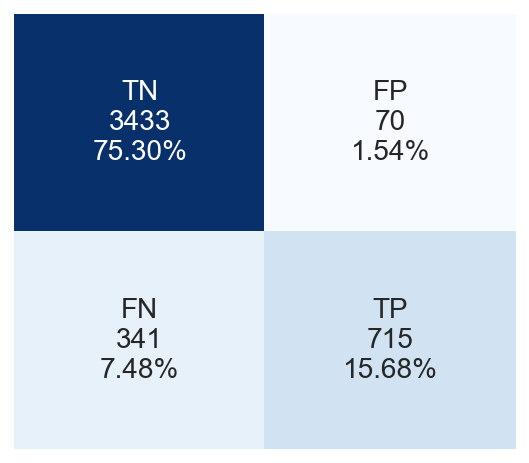

In [98]:
log2 = LogisticRegression().fit(tfidf_tr2, y_tr2)
y_pr_log_val2 = log2.predict(tfidf_val2)
get_metrics_confusion(tfidf_val2, y_val2, y_pr_log_val2, log2)

In [101]:
svc2 = svm.LinearSVC(random_state=42).fit(tfidf_tr2, y_tr2)
y_pr_svc_val2 = svc2.predict(tfidf_val2)
get_metrics_2(tfidf_val2, y_val2, y_pr_svc_val2, svc2)

Accuracy:  0.9080938802368941
F1:  0.7867684478371502
Recall:  0.7320075757575758
Precision:  0.8503850385038504
PR-AUC:  0.886307089105503


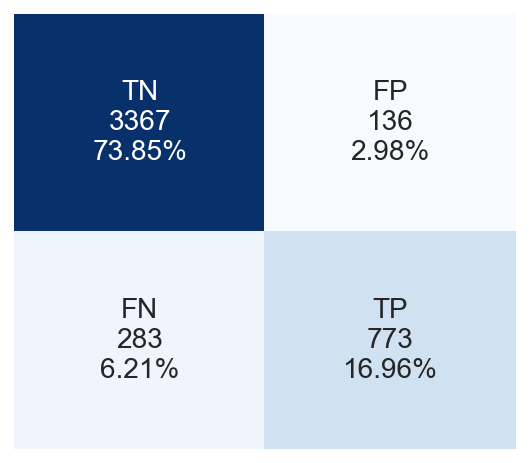

In [102]:
get_confusion(y_val2, y_pr_svc_val2)

Accuracy:  0.88528186005703
F1 Score:  0.7076579094466182
ROC-AUC:  0.9356621543006427
Recall:  0.5994318181818182
Precision:  0.8635743519781719
PR-AUC:  0.8509081977851588


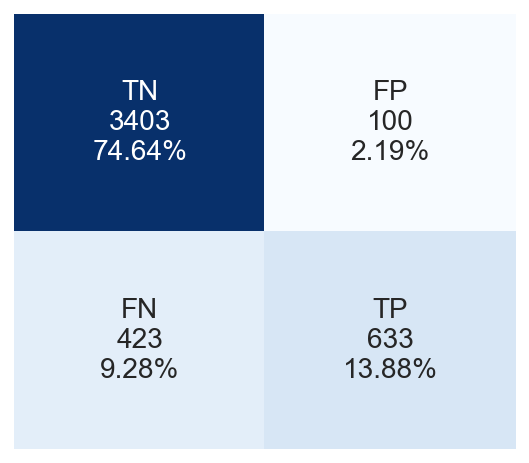

In [104]:
abc2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
    ).fit(tfidf_tr2, y_tr2)
y_pr_ada_val2 = abc2.predict(tfidf_val2)
get_metrics_confusion(tfidf_val2, y_val2, y_pr_ada_val2, abc2)

Accuracy:  0.874533889010748
F1 Score:  0.6333333333333332
ROC-AUC:  0.9155074870889887
Recall:  0.4678030303030303
Precision:  0.9801587301587301
PR-AUC:  0.7888386426935848


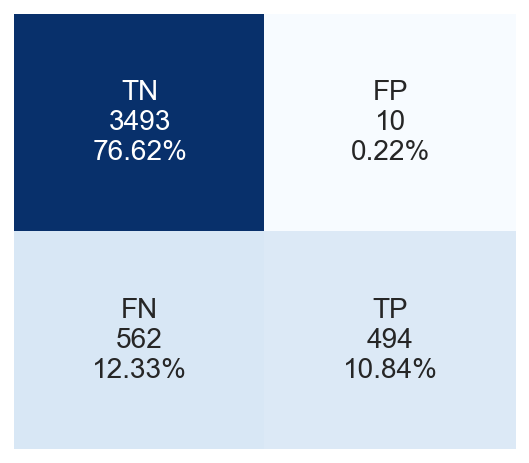

In [105]:
gbc2 = GradientBoostingClassifier().fit(tfidf_tr2, y_tr2)
y_pr_gbc_val2 = gbc2.predict(tfidf_val2)
get_metrics_confusion(tfidf_val2, y_val2, y_pr_gbc_val2, gbc2)

In [108]:
metrics5 = pd.read_csv("data/metrics5.csv")
metrics5

Unnamed: 0  Accuracy  F1 Score    Recall  Precision  \
0       Multinomial Naive Bayes  0.895066  0.819340  0.709677   0.969088   
1                 Random Forest  0.921063  0.877647  0.844369   0.913656   
2           Logistic Regression  0.924099  0.881517  0.842105   0.924798   
3        Support Vector Machine  0.919924  0.876464  0.847199   0.907823   
4           AdaBoost Classifier  0.906452  0.866069  0.902094   0.832811   
5  Gradient Boosting Classifier  0.876660  0.777550  0.642898   0.983550   

    ROC-AUC    PR AUC  
0  0.939315  0.925620  
1  0.963249  0.950887  
2  0.965593  0.955382  
3  0.964879  0.952225  
4  0.962628  0.936847  
5  0.947051  0.898102

# Doc2Vec

In [45]:
train = pickle.load(open("pickle/train.pickle", "rb"))
val = pickle.load(open("pickle/val.pickle", "rb"))
test = pickle.load(open("pickle/test.pickle", "rb"))

In [55]:
train.target.value_counts()

0    17514
1     1072
Name: target, dtype: int64

In [46]:
train['label'] = train.target.apply(lambda x: str(x))
val['label'] = val.target.apply(lambda x: str(x))
test['label'] = test.target.apply(lambda x: str(x))

In [47]:
X_train = train.tweet
X_val = val.tweet
X_test = test.tweet
y_train = train.target
y_val = val.target
y_test = test.target

## DBOW (Distributed Bag of Words)

In [48]:
train_tagged = train.apply(lambda x: TaggedDocument(words=x['tweet'], tags=[str(x.label)]), axis=1)
train_tagged.values[30]

TaggedDocument(words=['retard', 'bruh', 'lol'], tags=['1'])

In [49]:
val_tagged = val.apply(lambda x: TaggedDocument(words=x['tweet'], tags=[str(x.label)]), axis=1)
val_tagged.values[10]

TaggedDocument(words=['twitter', 'fag', 'youre', 'retard'], tags=['1'])

In [50]:
cores = multiprocessing.cpu_count()
model_dbow = Doc2Vec(dm=0, vector_size=100, negative=5, hs=0, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 18586/18586 [00:00<00:00, 2376397.21it/s]


In [51]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 18586/18586 [00:00<00:00, 2763687.53it/s]
CPU times: user 18.3 s, sys: 3.16 s, total: 21.4 s
Wall time: 16.8 s


In [53]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

y_tr_dbow, X_tr_dbow = vec_for_learning(model_dbow, train_tagged)
y_val_dbow, X_val_dbow = vec_for_learning(model_dbow, val_tagged)

In [54]:
logreg = LogisticRegression(n_jobs=1, C=1e5).fit(X_tr_dbow, y_tr_dbow)
y_pred_dbow = logreg.predict(X_val_dbow)

get_metrics_3(X_val_dbow, y_val_dbow, y_pred_dbow, logreg)

Accuracy:  0.937046004842615
F1:  0.1702127659574468
Recall:  0.11214953271028037
Precision:  0.35294117647058826
ROC-AUC:  0.7330152259345128
PR-AUC:  0.22062360214042687


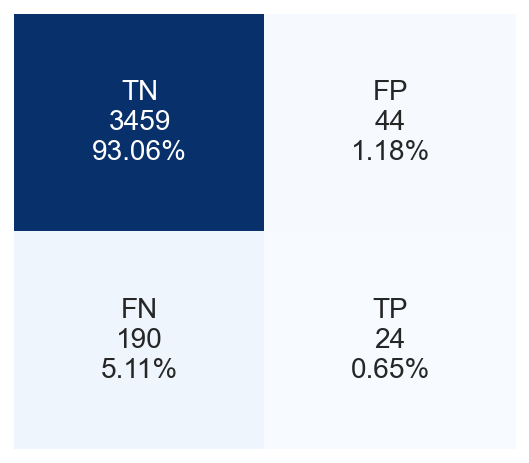

In [55]:
get_confusion(y_val_dbow, y_pred_dbow)

## DMM (Distributed Memory Mean)

In [56]:
cores = multiprocessing.cpu_count()
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=100, window=10, negative=5, min_count=1, workers=cores, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 18586/18586 [00:00<00:00, 2891840.12it/s]


In [57]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 18586/18586 [00:00<00:00, 3001745.64it/s]
CPU times: user 41.5 s, sys: 16.6 s, total: 58.1 s
Wall time: 43.6 s


In [58]:
y_tr_dmm, X_tr_dmm = vec_for_learning(model_dmm, train_tagged)
y_val_dmm, X_val_dmm = vec_for_learning(model_dmm, val_tagged)

logreg_2 = LogisticRegression().fit(X_tr_dmm, y_tr_dmm)
y_pred_dmm = logreg_2.predict(X_val_dmm)

get_metrics_3(X_val_dmm, y_val_dmm, y_pred_dmm, logreg_2)

Accuracy:  0.9171374764595104
F1:  0.28703703703703703
Recall:  0.2897196261682243
Precision:  0.28440366972477066
ROC-AUC:  0.7542440258149891
PR-AUC:  0.22569560150726564


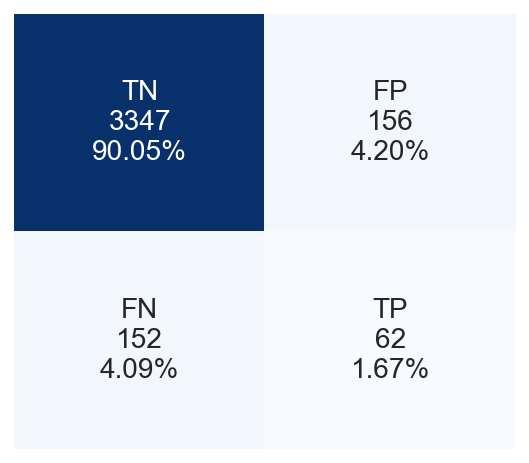

In [59]:
get_confusion(y_val_dmm, y_pred_dmm)